**Analise exploratória e aplicação de algoritmo Árvore de Decisão no dataset Earthquakes do Kaggle**

https://www.kaggle.com/datasets/thedevastator/uncovering-geophysical-insights-analyzing-usgs-e

In [19]:
#importação das bibliotecas e pacotes

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

In [4]:
#lendo o arquivo e analisando os dados
df = pd.read_csv('/content/usgs_main.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-03-04T21:28:02.440Z,38.759666,-122.719666,1.61,1.24,md,14.0,115.0,0.004494,0.04,...,2022-03-04T21:29:36.906Z,"3km SW of Anderson Springs, CA",earthquake,0.30,0.36,0.100,5.0,automatic,nc,nc
1,2022-03-04T21:27:28.190Z,38.833832,-122.815498,1.82,1.13,md,22.0,66.0,0.016320,0.02,...,2022-03-04T21:29:02.128Z,"8km NW of The Geysers, CA",earthquake,0.19,0.53,0.140,4.0,automatic,nc,nc
2,2022-03-04T21:25:05.130Z,35.596668,-120.271332,11.57,2.31,md,5.0,178.0,0.159000,0.01,...,2022-03-04T21:26:56.893Z,"11km SE of Shandon, CA",earthquake,3.14,3.51,0.760,3.0,automatic,nc,nc
3,2022-03-04T21:20:43.590Z,35.929167,-117.660833,3.25,0.88,ml,9.0,73.0,0.020530,0.13,...,2022-03-04T21:24:10.449Z,"22km E of Little Lake, CA",earthquake,0.33,0.74,0.055,10.0,automatic,ci,ci
4,2022-03-04T21:19:08.215Z,62.360200,-149.634500,9.80,1.40,ml,NaN,NaN,NaN,0.52,...,2022-03-04T21:22:15.794Z,"24 km NNE of Susitna North, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak


In [5]:
#verificando tamanho do dataset
df.shape

(75810, 22)

In [6]:
#verificando o nome das colunas
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [7]:
#eliminando colunas
df = df[['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms', 'type', 'horizontalError', 'depthError', 'magError', 'magNst']]

In [8]:
#excluindo registros com valores nulos
df.dropna(inplace=True)

In [9]:
#verificando novamente o tamanho do dataset
df.shape

(36773, 12)

In [12]:
#ordenando as colunas
colunas_ordenadas = ['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst', 'type']

In [13]:
df = df[colunas_ordenadas]

#Aplicando algoritimo Arvore de Decisão (DecisionTreeClassifier)

In [14]:
#separando os dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(df[['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms',  
       'horizontalError', 'depthError', 'magError', 'magNst']], df['type'], test_size=0.2)

In [16]:
arv = DecisionTreeClassifier(max_depth=3)
arv.fit(X_treino, y_treino)
acuracia_treino = arv.score(X_treino, y_treino)
acuracia_treino

0.9891902916581685

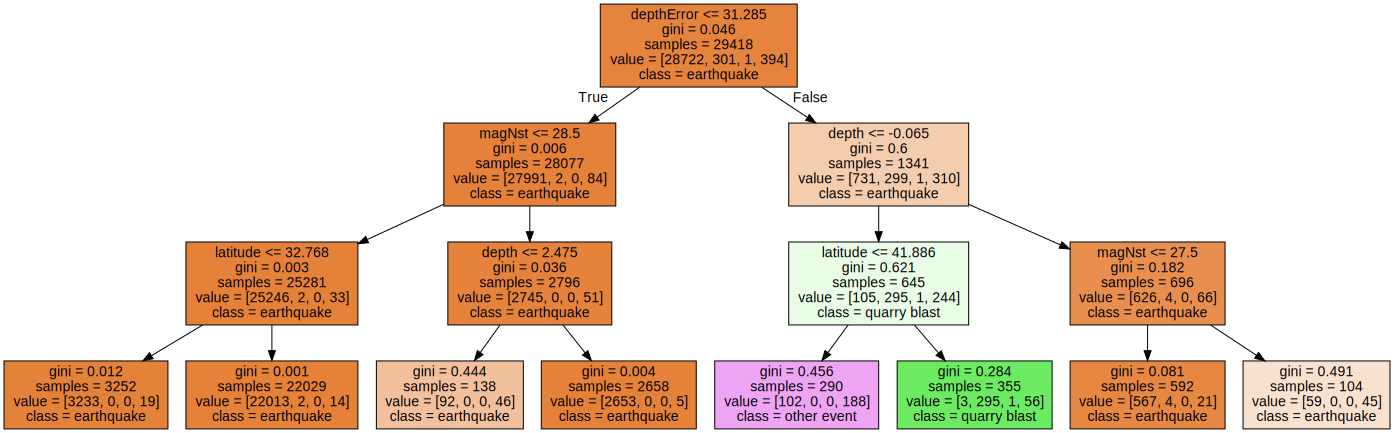

In [20]:
#grafico do modelo
graf = export_graphviz(arv, filled=True, feature_names=['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms',  
       'horizontalError', 'depthError', 'magError', 'magNst'], 
       class_names=['earthquake', 'quarry blast', 'explosion', 'other event', 'chemical explosion'])

Source(graf)

#obs.: obs.: com base nos valores das variáveis preditoras o algoritmo irá formar os nós da Arvore de decisão, sobre os valores da variável target (TYPE)